In [5]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.expected_conditions import *
from selenium.webdriver.edge.service import Service as EdgeService
from webdriver_manager.microsoft import EdgeChromiumDriverManager

import time
import json
import os
import csv

In [9]:
url = 'http://10.113.178.219'

In [6]:


def open_driver(url):
    options = webdriver.EdgeOptions()
    options.add_experimental_option('excludeSwitches', ['enable-logging'])  # 忽略警告和错误
    service = EdgeService(EdgeChromiumDriverManager().install())
    driver = webdriver.Edge(service=service, options=options)
    driver.get(url)
    driver.implicitly_wait(5)  # 设置浏览器驱动的等待时间限制
    driver.maximize_window()
    return driver


### Task 0: Login

The first task is to complete the following code blocks to login our CDS Shop website using Selenium.
1. Go to login page
2. Keyin your account and password 
3. Press login button

In [7]:
def login(driver):
    account = 'mc46526'+'@um.edu.mo'  # Replace with your account
    password = 'mc46526'  # Replace with your password

    driver.get(url)  # Replace with the actual login page URL
    try:
        print("Navigated to login page")
        # Wait for the sign-in page button to appear
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "/html/body/div/header/nav/div/div/div/a[2]")))
        sign_in_page_button = driver.find_element(By.XPATH, "/html/body/div/header/nav/div/div/div/a[2]")
        print("Sign in button found")
        sign_in_page_button.click()

        # Wait for the account input field to appear
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "/html/body/div/main/div/div/div/div/form/div[1]/input")))
        account_input = driver.find_element(By.XPATH, "/html/body/div/main/div/div/div/div/form/div[1]/input")
        print("Account input found")
        account_input.send_keys(account)

        # Wait for the password input field to appear
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "/html/body/div/main/div/div/div/div/form/div[2]/input")))
        password_input = driver.find_element(By.XPATH, "/html/body/div/main/div/div/div/div/form/div[2]/input")
        print("Password input found")
        password_input.send_keys(password)

        # Wait for the login button to appear
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "/html/body/div/main/div/div/div/div/form/button")))
        sign_in = driver.find_element(By.XPATH, "/html/body/div/main/div/div/div/div/form/button")
        print("Login button found")
        sign_in.click()

        print("Login successful")
        
        # Add a delay to observe the login result
        time.sleep(5)  # Adjust the delay time as needed

    except Exception as e:
        print(f"An error occurred: {e}")


In [86]:
def t0():
    driver = open_driver(url)
    login(driver)
    driver.close()

t0()

Navigated to login page
Sign in button found
Account input found
Password input found
Login button found
Login successful


### Task 1: Place an order

This task requires you to place an order to purchase 5 units of the last product available on the CDS shop.

1. Go to last page
2. Find the last product
3. Set the quantity as 5
4. Press add to Cart
5. Proceed to check out
6. Fill shipping information (type anything in the postal address...)
7. Continue until you reach the payment page

In [82]:
def go_to_last_page(driver):
    try:
        # Wait for the pagination controls to be present
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "/html/body/div/main/div/ul")))
        
        # Find the pagination control
        pagination = driver.find_element(By.XPATH, "/html/body/div/main/div/ul")
        
        # Find all page buttons within the pagination control
        page_buttons = pagination.find_elements(By.CLASS_NAME, "page-link")
        
        # Click the last page button
        if page_buttons:
            last_page_button = page_buttons[-1]
            last_page_button.click()
            print("Navigated to the last page")
        else:
            print("No page buttons found")
    except Exception as e:
        print(f"An error occurred while navigating to the last page: {e}")
    
    return driver

In [83]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import Select

def place_an_order_on_last_product(driver):
    try:
        # Wait for the product list to be present
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "row")))
        print("Product list found")

        # Find the product list
        product_list = driver.find_element(By.CLASS_NAME, "row")
        
        # Find all products within the product list
        products = product_list.find_elements(By.CLASS_NAME, "col-xl-3")
        print(f"Number of products found: {len(products)}")
        
        # Find the last product
        if products:
            last_product = products[-1]
            print("Last product found")
            
            # Click on the last product's link to view details
            last_product_link = last_product.find_element(By.XPATH, ".//a[@href]")
            last_product_link.click()
            print("Clicked on the last product link")
            
            # Confirm the product details page is loaded by checking the presence of the return button
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "/html/body/div/main/div/a")))
            print("Product details page loaded")
            
            # Wait for the quantity select field to be present
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "/html/body/div/main/div/div[1]/div[3]/div/div/div[3]/div/div[2]/select")))
            quantity_select = driver.find_element(By.XPATH, "/html/body/div/main/div/div[1]/div[3]/div/div/div[3]/div/div[2]/select")
            print("Quantity select found")
            
            # Set the quantity to 5
            select = Select(quantity_select)
            select.select_by_value("5")
            print("Quantity set to 5")
            
            # Wait for the "Add to Cart" button to be present
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "/html/body/div/main/div/div[1]/div[3]/div/div/div[4]/button")))
            add_to_cart_button = driver.find_element(By.XPATH, "/html/body/div/main/div/div[1]/div[3]/div/div/div[4]/button")
            add_to_cart_button.click()
            print("Added to cart")
            
            # Proceed to checkout
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "/html/body/div/main/div/div/div[2]/div/div/div[2]/button")))
            checkout_button = driver.find_element(By.XPATH, "/html/body/div/main/div/div/div[2]/div/div/div[2]/button")
            checkout_button.click()
            print("Proceeded to checkout")
            
            # Fill in shipping information
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "/html/body/div/main/div/div/div/div/form/div[1]/input")))
            shipping_address = driver.find_element(By.XPATH, "/html/body/div/main/div/div/div/div/form/div[1]/input")
            shipping_address.send_keys("123 Main St, Anytown, USA")
            print("Shipping information filled")
            
            # Continue to the payment page
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "/html/body/div/main/div/div/div/div/form/button")))
            continue_to_payment_button = driver.find_element(By.XPATH, "/html/body/div/main/div/div/div/div/form/button")
            continue_to_payment_button.click()
            print("Continued to payment page")
            
        else:
            print("No products found")
    except Exception as e:
        print(f"An error occurred while placing an order: {e}")
    
    return 0


In [84]:
def t1():
    driver = open_driver(url)
    driver = go_to_last_page(driver)
    place_an_order_on_last_product(driver)
    driver.close()

t1()   

Navigated to the last page
Product list found
Number of products found: 2
Last product found
Clicked on the last product link
Product details page loaded
Quantity select found
Quantity set to 5
Added to cart
Proceeded to checkout
Shipping information filled
Continued to payment page


### Task 2: Fetch the products with specific review rating

This task requires you to retrieve products with a review rating greater than or equal to 2.5.

1. Iterate all pages.
2. Open product page in new tab.
3. Find the review column.
4. Find the pattern of rating(empty filled, half filled, full filled).

In [17]:
def go_to_next_page(driver):
    try:
        # Wait for pagination to be present
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "pagination")))
        pagination = driver.find_element(By.CLASS_NAME, "pagination")
        
        # Find all page links
        page_links = pagination.find_elements(By.CLASS_NAME, "page-link")
        
        # Find the active page number
        active_page = pagination.find_element(By.CLASS_NAME, "active")
        current_page_num = int(active_page.text)
        
        # Click next page if it exists
        for link in page_links:
            if link.text.isdigit() and int(link.text) == current_page_num + 1:
                link.click()
                # Wait for page to load
                time.sleep(2)
                return True
                
        return False  # No more pages
        
    except Exception as e:
        print(f"Error navigating to next page: {e}")
        return False

In [45]:
def get_review(driver):
    try:
        # Wait for rating element to be present
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "rating")))
        
        # Count full stars
        full_stars = len(driver.find_elements(By.CSS_SELECTOR, ".rating .fas.fa-star"))
        
        # Count half stars
        half_stars = len(driver.find_elements(By.CSS_SELECTOR, ".rating .fas.fa-star-half-alt"))
        
        # Calculate total rating
        rating = full_stars + (half_stars * 0.5)
        
        return rating
        
    except Exception as e:
        print(f"Error getting review: {e}")
        return 0

In [46]:
def open_products_in_new_tab(driver):
    products_rating = {}
    
    try:
        # Wait for product cards to be present
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "card")))
        
        # Get all product cards
        product_cards = driver.find_elements(By.CLASS_NAME, "card")
        
        for card in product_cards:
            # Get product name
            name = card.find_element(By.CSS_SELECTOR, ".card-body strong").text
            
            # Get product link
            link = card.find_element(By.CSS_SELECTOR, ".card-body a").get_attribute("href")
            
            # Open product in new tab
            driver.execute_script(f"window.open('{link}', '_blank')")
            
            # Switch to new tab
            driver.switch_to.window(driver.window_handles[-1])
            
            # Get review rating
            rating = get_review(driver)
            
            if rating >= 2.5:
                products_rating[name] = rating
            
            # Close tab and switch back
            driver.close()
            driver.switch_to.window(driver.window_handles[0])
            
        return products_rating
        
    except Exception as e:
        print(f"Error processing products: {e}")
        return {}

In [47]:
def t2():
    try:
        driver = open_driver(url)
        login(driver)
        high_rated_products = {}
        
        while True:
            # Get products from current page
            page_products = open_products_in_new_tab(driver)
            high_rated_products.update(page_products)
            
            # Try to go to next page
            if not go_to_next_page(driver):
                break
                
        print("\nProducts with rating >= 2.5:")
        for product, rating in high_rated_products.items():
            print(f"{product}: {rating}")
            
        driver.close()
        
    except Exception as e:
        print(f"Error in main task: {e}")
        driver.quit()

# Execute Task 2
t2()

Navigated to login page
Sign in button found
Account input found
Password input found
Login button found
Login successful
Error navigating to next page: invalid literal for int() with base 10: '1\n(current)'

Products with rating >= 2.5:
- 19th centery Flower Art Roman emperor: 4.0
- WorldWide Roman emperor Wax Stamp Vintage: 5.0
128GB OPPO Watch Plus 5G Pro: 3.0
256GB 5G Redmi Note red 2nd Generation: 5.0
2nd Generation 64GB red OPPO Watch 3rd Generation: 5.0
3rd Generation 2nd Generation red headsets Gold: 4.0
3rd Generation Gold 128GB cell Phones_smartphones Apple: 3.0


### Task 3: Purchase the 10 most expensive products.
This task entails adding the 10 most expensive products to the cart in a **single order** and proceeding with the payment.

To proceed with the payment, you are required to pass a **captcha code test** using the ["ddddocr"](https://github.com/sml2h3/ddddocr) library.

1. Empty the carts
2. Get the names of the 10 most expensive products.
3. Add them into cart by searching products name.
4. Place the order when all the products are in the carts.
5. Proceed the payment.

In [3]:
def empty_carts(driver):
    """
    Empty all items in the shopping cart
    Args:
        driver: WebDriver instance
    Returns:
        driver: WebDriver instance after emptying cart
    """
    try:
        # Click the cart button to go to the cart page
        cart_button = driver.find_element(By.XPATH, '/html/body/div/header/nav/div/div/div/a')
        cart_button.click()
        
        while True:
            try:
                # Find and click the delete button for each item in the cart
                delete_buttons = driver.find_elements(By.CSS_SELECTOR, "button.btn.btn-light > i.fas.fa-trash")
                if not delete_buttons:
                    break
                for button in delete_buttons:
                    button.click()
                    WebDriverWait(driver, 10).until(
                        EC.presence_of_element_located((By.CSS_SELECTOR, "div.fade.alert.alert-info.show"))
                    )
            except Exception as e:
                print(f"An error occurred while deleting items: {e}")
                break
        
        print("Cart emptied successfully")
        
        # Click the "Go Back" link to return to the initial page
        go_back_link = driver.find_element(By.XPATH, '//a[text()="Go Back"]')
        go_back_link.click()
        print("Returned to the initial page")
        
    except Exception as e:
        print(f"An error occurred: {e}")
    
    return driver


In [19]:
from selenium.webdriver.common.by import By

def fetch_top10_names(driver):
    products = []
    
    while True:
        # Locate all product elements on the page
        product_elements = driver.find_elements(By.XPATH, '/html/body/div/main/div/div[2]/div')
        
        for product in product_elements:
            # Extract the product name
            name = product.find_element(By.XPATH, './/div[@class="card-title"]/strong').text
            # Extract the product price
            price_text = product.find_element(By.XPATH, './/h3[@class="card-text"]').text
            price = float(price_text.replace('$', ''))
            
            products.append((name, price))
        
        # Try to go to the next page
        if not go_to_next_page(driver):
            break
    
    # Sort products by price in descending order and get the top 10
    top10_products = sorted(products, key=lambda x: x[1], reverse=True)[:10]
    
    # Print the names and prices of the top 10 products
    for product in top10_products:
        print(f"{product[0]}: ${product[1]}")
    
    return [product[0] for product in top10_products]

# Example usage
# driver = open_driver(url)
# top10_names = fetch_top10_names(driver)
# print(top10_names)


In [21]:
def place_products_orders(driver, names):
    """
    Add products to cart by searching their names
    Args:
        driver: WebDriver instance
        names: List of product names to order
    Returns:
        success_count: Number of successfully added products
    """
    success_count = 0
    
    for name in names:
        try:
            # Navigate to home page
            driver.get(url)
            
            # Find and fill search box
            search_box = driver.find_element(By.NAME, "q")
            search_box.clear()
            search_box.send_keys(name)
            
            # Click search button
            search_button = driver.find_element(By.XPATH, "//button[@type='submit']")
            search_button.click()
            
            # Wait for the product link to be present and click it
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '/html/body/div/main/div/div/div[1]/div/div/a/div/strong')))
            product_link = driver.find_element(By.XPATH, '/html/body/div/main/div/div/div[1]/div/div/a/div/strong')
            product_link.click()
            
            # Wait for the add to cart button to be present and click it
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '/html/body/div/main/div/div[1]/div[3]/div/div/div[4]/button')))
            add_to_cart_button = driver.find_element(By.XPATH, '/html/body/div/main/div/div[1]/div[3]/div/div/div[4]/button')
            add_to_cart_button.click()
            
            success_count += 1
            print(f"Added {name} to cart")
            
            # Navigate back to the main page
            main_page_button = driver.find_element(By.XPATH, '/html/body/div/header/nav/div/a')
            main_page_button.click()
            
        except Exception as e:
            print(f"Failed to add {name} to cart: {str(e)}")
    
    return success_count

# Example usage
# driver = open_driver(url)
# top10_names = fetch_top10_names(driver)
# success_count = place_products_orders(driver, top10_names)
# print(f"Successfully added {success_count} products to cart")


In [ ]:
import base64
import ddddocr
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

def pay_for_order(driver):
    """
    Process payment with captcha verification
    Args:
        driver: WebDriver instance
    Returns:
        status: Payment status (1 for success, 0 for failure)
    """
    try:
        # Navigate to cart and click checkout
        driver.get(url + "/cart")
        checkout_button = driver.find_element(By.XPATH, '/html/body/div/main/div/div/div[2]/div/div/div[2]/button')
        checkout_button.click()
        
        # Fill in shipping information
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "/html/body/div/main/div/div/div/div/form/div[1]/input")))
        street_address = driver.find_element(By.XPATH, "/html/body/div/main/div/div/div/div/form/div[1]/input")
        city = driver.find_element(By.XPATH, "/html/body/div/main/div/div/div/div/form/div[2]/input")
        house_number = driver.find_element(By.XPATH, "/html/body/div/main/div/div/div/div/form/div[3]/input")
        country = driver.find_element(By.XPATH, "/html/body/div/main/div/div/div/div/form/div[4]/input")
        
        street_address.send_keys("Main St")
        city.send_keys("Anytown")
        house_number.send_keys("123")
        country.send_keys("USA")
        
        # Continue to the payment page
        continue_to_payment_button = driver.find_element(By.XPATH, "/html/body/div/main/div/div/div/div/form/button")
        continue_to_payment_button.click()
        
        # Wait for 1 second and ensure the text appears on the page
        time.sleep(1)
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "/html/body/div/main/div/div/div/div/h1")))
        
        # Click the button again to proceed
        continue_to_payment_button = driver.find_element(By.XPATH, "/html/body/div/main/div/div/div/div/form/button")
        continue_to_payment_button.click()
        
        # Click the next button to proceed with payment
        next_button = driver.find_element(By.XPATH, '/html/body/div/main/div/div[2]/div[2]/div/div/div[7]/button')
        next_button.click()
        
        # Initialize OCR
        ocr = ddddocr.DdddOcr()
        
        # Handle captcha
        max_attempts = 3
        for attempt in range(max_attempts):
            try:
                # Get captcha image
                captcha_img = driver.find_element(By.XPATH, '/html/body/div/main/div/div/div[2]/div/div/div[6]/div/div/div[1]/div/canvas')
                img_base64 = captcha_img.screenshot_as_base64
                img_bytes = base64.b64decode(img_base64)
                
                # Solve captcha
                captcha_result = ocr.classification(img_bytes)
                
                # Input captcha
                captcha_input = driver.find_element(By.XPATH, '/html/body/div/main/div/div/div[2]/div/div/div[6]/div/div/div[2]/div/input')
                captcha_input.clear()
                captcha_input.send_keys(captcha_result)
                
                # Submit payment
                submit_button = driver.find_element(By.XPATH, '/html/body/div/main/div/div/div[2]/div/div/div[6]/div/div/div[3]/div/button')
                submit_button.click()
                
                # Check for success message
                WebDriverWait(driver, 5).until(
                    EC.presence_of_element_located((By.CLASS_NAME, "success-message"))
                )
                print("Payment successful!")
                return 1
                
            except Exception as e:
                print(f"Captcha attempt {attempt + 1} failed: {str(e)}")
                if attempt == max_attempts - 1:
                    print("Max captcha attempts reached")
                    return 0
                
    except Exception as e:
        print(f"Payment failed: {str(e)}")
        return 0

# Example usage
# driver = open_driver(url)
# login(driver)
# empty_carts(driver)
# top10_names = fetch_top10_names(driver)
# place_products_orders(driver, top10_names)
# pay_for_order(driver)


In [37]:
def t3(): 
    driver = open_driver(url)
    login(driver)
    driver = empty_carts(driver)  # Empty the cart
    top10_names = fetch_top10_names(driver)  # Get the names of the 10 most expensive products
    place_products_orders(driver, top10_names)  # Add these products to the cart
    pay_for_order(driver)  # Proceed with the payment
    driver.close()  # Close the browser

# Execute Task 3
t3()


Navigated to login page
Sign in button found
Account input found
Password input found
Login button found
Login successful
Cart emptied successfully
Returned to the initial page
Error navigating to next page: invalid literal for int() with base 10: '1\n(current)'
- WorldWide Roman emperor Wax Stamp Vintage: $903.99
3rd Generation 2nd Generation red headsets Gold: $623.99
2021 Apple TV 4K 32GB: $570.99
- Art Asia Roman emperor Used: $552.99
19th centery Style Wax Stamp Used Butterfly: $521.99
3rd Generation Gold 128GB cell Phones_smartphones Apple: $493.99
128GB OPPO Watch Plus 5G Pro: $343.99
2nd Generation 64GB red OPPO Watch 3rd Generation: $245.99
256GB 5G Redmi Note red 2nd Generation: $170.99
- 19th centery Flower Art Roman emperor: $66.99
Added - WorldWide Roman emperor Wax Stamp Vintage to cart
Added 3rd Generation 2nd Generation red headsets Gold to cart
Added 2021 Apple TV 4K 32GB to cart
Added - Art Asia Roman emperor Used to cart
Added 19th centery Style Wax Stamp Used Butter

---


### Task 4: Flash sale (bonus)

This task is time-limited, and only the first few orders will secure the products for you. We count the time based on the payment time rather than the order time. We will randomly reduce prices for select items in a period of time. We will anounce you the time slot in class. Your task is to identify these discounted products, place the order, and complete the payment. Successful purchases will be marked as delivered, as shown in the image.


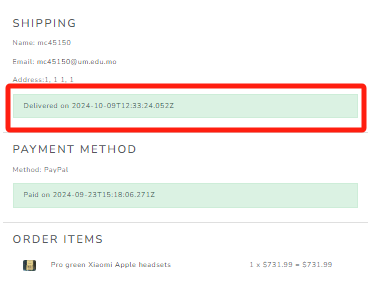

1. You are expected to crawl and store the names and prices of all products in advance.
2. There will be 4 rounds for the flash sale, with the quota decreasing as each round progresses.
3. Only an order with completed payment and each order containing only one product will be considered a valid order.
4. Submit your purchasing code in the following code block. 


In [31]:
def t4():
    return 0